<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [59]:
data = pd.read_csv(r'/content/SMSSpamCollection (1).csv')

# Print the first 5 records
data.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
# Counting spam and ham instances
ham_spam = data['Class'].value_counts()

# Print ham_spam
print(ham_spam)

# Print percentage of spam messages in your dataset
spam_percentage = (ham_spam[1] / len(data)) * 100
print(f'Percentage of spam messages: {spam_percentage:.2f}%')

# Mapping 'ham' to 0 and 'spam' to 1 in the 'label' column
data['label'] = data['Class'].map({'ham': 0, 'spam': 1})

# Print last 5 records of the dataset
data.head()



ham     4825
spam     747
Name: Class, dtype: int64
Percentage of spam messages: 13.41%


,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [61]:
# Fetch all features
X = data['sms']

# Fetch label
y = data['label']

# Print the shape of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Import train_test_split
from sklearn.model_selection import train_test_split

# Splitting into test and train with a random state as 1 and test size as 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Print the shape of the training and testing sets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X: (5572,)
Shape of y: (5572,)
Shape of X_train: (4179,)
Shape of X_test: (1393,)
Shape of y_train: (4179,)
Shape of y_test: (1393,)


In [62]:
# Print X_train first 5 records
print(X_train.head())


710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object


In [63]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer with stop_words
vect = CountVectorizer(stop_words='english')

# Fit vect on your feature text (X_train)
X_train_vectorized = vect.fit_transform(X_train)


In [64]:
# Check count of words in your features
word_count = len(vect.vocabulary_)

# Print the count of words
print(f'Count of words in features: {word_count}')

# Print the first few entries of the vocabulary
print('First few entries of the vocabulary:')
# Print the entire vocabulary
print('Vocabulary:')
for word, index in vect.vocabulary_.items():
    print(f'{word}: {index}')



Streaming output truncated to the last 5000 lines.
tirupur: 6430
realize: 5216
premier: 5001
freephone: 2786
542: 541
0578: 18
handle: 3100
victoria: 6761
island: 3504
traffic: 6509
infernal: 3423
affairs: 817
xy: 7132
impossible: 3391
treats: 6531
sub: 6095
released: 5288
necessary: 4408
nah: 4368
dub: 2333
je: 3554
buff: 1454
randomlly: 5180
5min: 546
opening: 4609
bot: 1351
notes: 4507
oredi: 4632
save: 5511
stress: 6057
dorm: 2277
dudette: 2339
scraped: 5539
barrel: 1156
social: 5836
misfits: 4210
video: 6764
handset: 3102
750: 600
unlimited: 6656
reache: 5202
propose: 5081
seing: 5577
bloody: 1309
funky: 2838
asssssholeeee: 1045
sooooo: 5872
short: 5683
prove: 5087
hopeing: 3263
wasn: 6871
sisters: 5746
arrested: 1014
haf: 3080
cam: 1524
intrude: 3471
tuition: 6571
budget: 1452
bold: 1328
dollars: 2262
representative: 5325
169: 305
6031: 558
10am: 252
luckily: 3979
starring: 5990
role: 5411
sea: 5551
lays: 3777
envelope: 2452
technical: 6280
networking: 4436
field: 2640
gentle: 28

In [65]:
# Get feature names from CountVectorizer
feature_names = vect.get_feature_names_out()

# Print the first few feature names
print('Feature Names:')
print(feature_names[:10])  # Adjust the number to display more or fewer feature names


Feature Names:
['00' '000' '008704050406' '0121' '01223585236' '01223585334' '0125698789'
 '02' '0207' '02072069400']


In [66]:
# Transform feature data
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

# Print transformed data for X_train as an array
print('X_train_transformed:')
print(X_train_transformed.toarray())

# Print length of feature names
print(f'Length of feature names: {len(vect.get_feature_names_out())}')


X_train_transformed:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Length of feature names: 7204


In [67]:
# Print shape of X_train_transformed
print(f'Shape of X_train_transformed: {X_train_transformed.shape}')

# Print X_train_transformed
print('X_train_transformed:')
print(X_train_transformed.toarray())


Shape of X_train_transformed: (4179, 7204)
X_train_transformed:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
# Print feature names
feature_names = vect.get_feature_names_out()
print('Feature Names:')
print(feature_names)


Feature Names:
['00' '000' '008704050406' ... 'zyada' 'èn' '〨ud']


In [69]:


# Convert X_train_transformed to DataFrame
X_train_df = pd.DataFrame(X_train_transformed.toarray(), columns=feature_names)

# Print the DataFrame
X_train_df


,00,000,008704050406,0121,01223585236,01223585334,0125698789,02,0207,02072069400,...,zed,zeros,zhong,zindgi,zoe,zoom,zouk,zyada,èn,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Import BernoulliNB
from sklearn.naive_bayes import BernoulliNB

# Instantiate BernoulliNB object
bnb = BernoulliNB()

# Fit the model on the training dataset
bnb.fit(X_train_transformed, y_train)

# Predict class of y
y_pred_class = bnb.predict(X_test_transformed)

# Predict probability on y
y_pred_proba = bnb.predict_proba(X_test_transformed)[:, 1]

# Print accuracy score
accuracy = bnb.score(X_test_transformed, y_test)
print(f'Accuracy Score: {accuracy:.2f}')


Accuracy Score: 0.98


In [71]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix
confusion = confusion_matrix(y_test, y_pred_class)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

# Print True Negative, False Positive, False Negative, True Positive
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Positive (TP): {TP}')


Confusion Matrix:
[[1207    1]
 [  31  154]]
True Negative (TN): 1207
False Positive (FP): 1
False Negative (FN): 31
True Positive (TP): 154


In [72]:
# Calculate sensitivity
sensitivity = TP / (TP + FN)

# Print sensitivity
print(f'Sensitivity: {sensitivity:.4f}')

# Calculate specificity
specificity = TN / (TN + FP)

# Print specificity
print(f'Specificity: {specificity:.4f}')

# Calculate precision
precision = TP / (TP + FP)

# Print precision
print(f'Precision: {precision:.4f}')


Sensitivity: 0.8324
Specificity: 0.9992
Precision: 0.9935


In [73]:
from sklearn.metrics import classification_report

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1208
           1       0.99      0.83      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



Area under the curve (ROC AUC): 0.9968


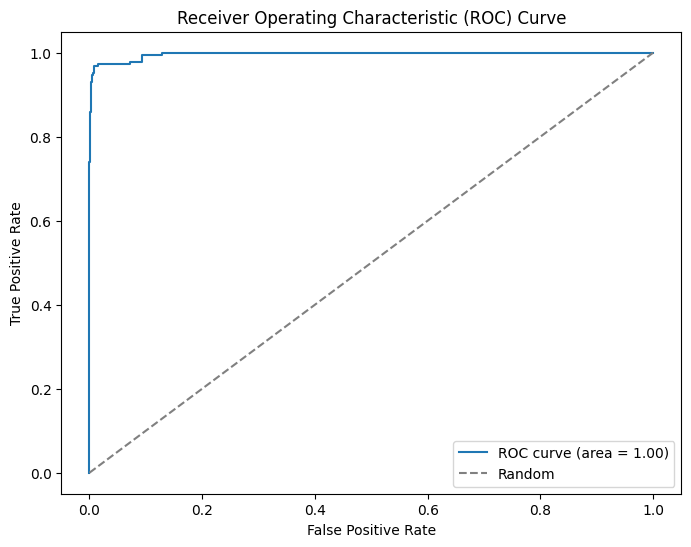

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate false_positive_rate, true_positive_rate, and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate area under the curve (ROC AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print area under the curve
print(f'Area under the curve (ROC AUC): {roc_auc:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [75]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate MultinomialNB object
mnb = MultinomialNB()

# Fit the model on the training dataset
mnb.fit(X_train_transformed, y_train)

# Predict class of y
y_pred_class = mnb.predict(X_test_transformed)

# Predict probability on y
y_pred_proba = mnb.predict_proba(X_test_transformed)[:, 1]

# Print accuracy score
accuracy = mnb.score(X_test_transformed, y_test)
print(f'Accuracy Score: {accuracy:.2f}')


Accuracy Score: 0.99


In [76]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix
confusion = confusion_matrix(y_test, y_pred_class)

# Print confusion matrix
print('Confusion Matrix:')
print(confusion)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

# Print True Negative, False Positive, False Negative, True Positive
print(f'True Negative (TN): {TN}')
print(f'False Positive (FP): {FP}')
print(f'False Negative (FN): {FN}')
print(f'True Positive (TP): {TP}')


Confusion Matrix:
[[1201    7]
 [  10  175]]
True Negative (TN): 1201
False Positive (FP): 7
False Negative (FN): 10
True Positive (TP): 175


In [77]:
from sklearn.metrics import classification_report

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_class))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1208
           1       0.96      0.95      0.95       185

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



Area under the curve (ROC AUC): 0.9922


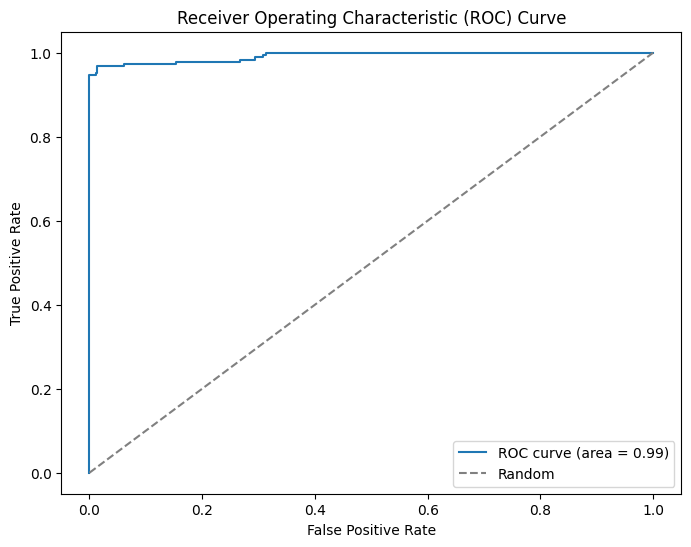

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate false_positive_rate, true_positive_rate, and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate area under the curve (ROC AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print area under the curve
print(f'Area under the curve (ROC AUC): {roc_auc:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Instantiate GaussianNB object
gnb = GaussianNB()

# Fit the model on the training dataset
gnb.fit(X_train_transformed.toarray(), y_train)  # Note: toarray() is used to convert the sparse matrix to a dense array

# Predict class of y
y_pred_class = gnb.predict(X_test_transformed.toarray())

# Predict probability on y
y_pred_proba = gnb.predict_proba(X_test_transformed.toarray())[:, 1]

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy Score: {accuracy:.2f}')


Accuracy Score: 0.89


Area under the curve (ROC AUC): 0.9115


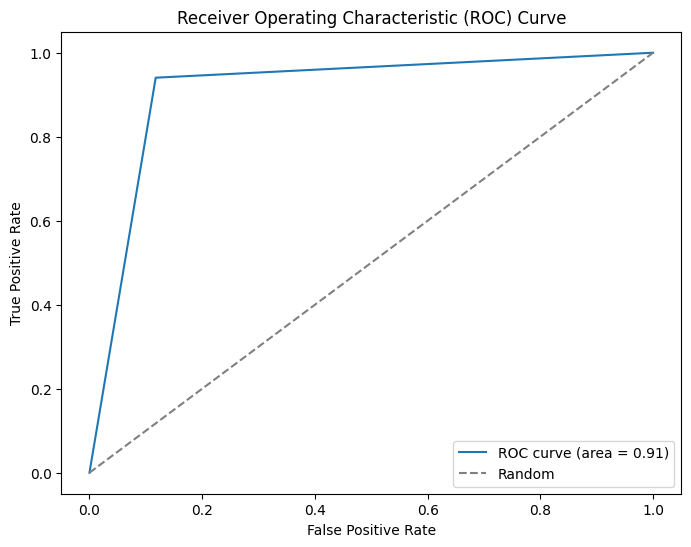

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate false_positive_rate, true_positive_rate, and thresholds using roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate area under the curve (ROC AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print area under the curve
print(f'Area under the curve (ROC AUC): {roc_auc:.4f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
